In [1]:
import pandas as pd
import numpy as np 


In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Saif Siddiqui\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

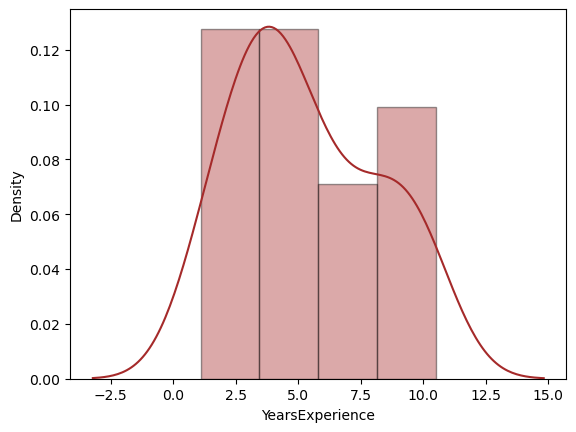

In [7]:
import seaborn as sns
sns.distplot(dataset['YearsExperience'],color='brown',hist_kws=dict(edgecolor='black'))

C:\Users\Saif Siddiqui\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

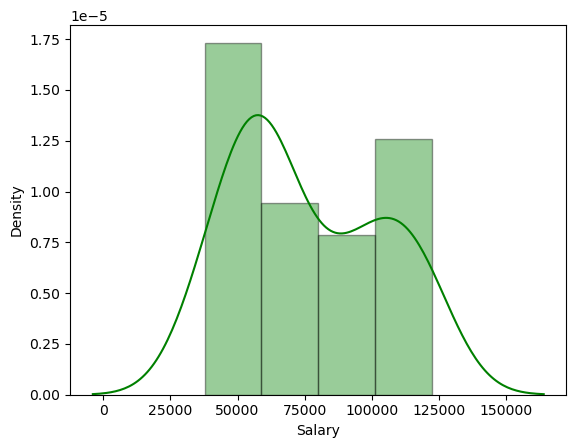

In [9]:
sns.distplot(dataset['Salary'],color ='green',hist_kws=dict(edgecolor='black'))

In [11]:
dataset['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

<AxesSubplot:>

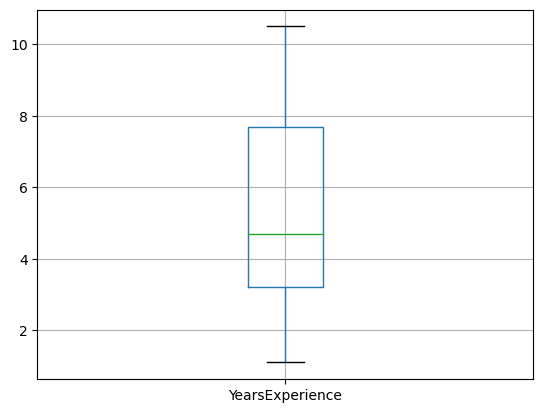

In [13]:
dataset.boxplot(column=['YearsExperience'])

<AxesSubplot:>

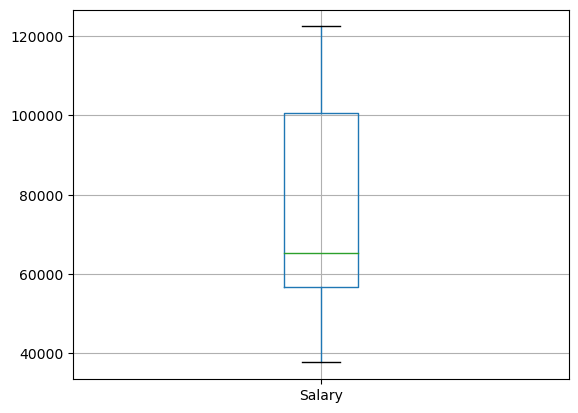

In [14]:
dataset.boxplot(column=['Salary'])

In [15]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
import statsmodels.formula.api as smf

In [17]:
model = smf.ols("Salary~YearsExperience",data=dataset).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        10:47:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
model.tvalues, model.pvalues


(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [21]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [22]:
# Manual prediction for say 3 Years Experience
salary = (25792.200199) + (9449.962321)*(3)

In [23]:
salary

54142.087162

In [29]:
#predicting salary for 8,9,5,10

In [30]:
new_data = pd.Series([8,9,5,10])
new_data

0     8
1     9
2     5
3    10
dtype: int64

In [31]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,8
1,9
2,5
3,10


In [32]:
model.predict(data_pred)

0    101391.898770
1    110841.861092
2     73042.011806
3    120291.823413
dtype: float64